##Building Regression model for predicting the marks of a student based on the number of hours studied

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("std_data.csv")


In [ ]:
# Select only the columns we need for this analysis
df = df[['StudyTimeWeekly', 'GPA']]

# Handle missing values by dropping rows with any missing data
df.dropna(inplace=True)


<ipython-input-3-3c23e5ce89b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


#Relationship in our Data

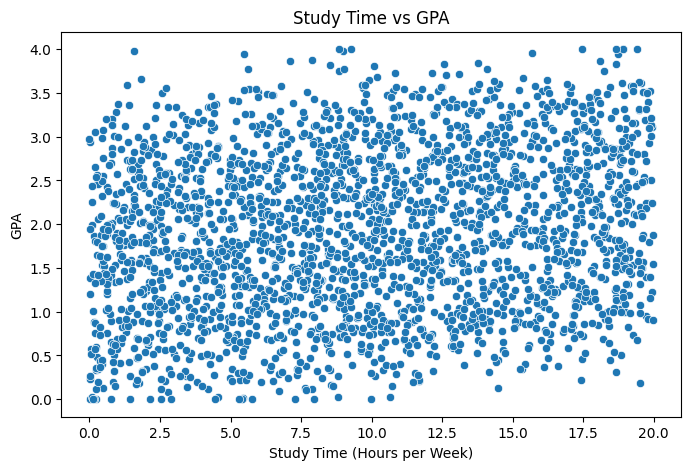

In [ ]:
# Visualize the relationship between StudyTimeWeekly and GPA
plt.figure(figsize=(8, 5))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.xlabel("Study Time (Hours per Week)")
plt.ylabel("GPA")
plt.title("Study Time vs GPA")
plt.show()


#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the predictor (X) and target variable (y)
X = df[['StudyTimeWeekly']]
y = df['GPA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.76
Mean Squared Error: 0.82
R-squared Score: 0.01
Model Accuracy (R-squared): 0.007480506788430263


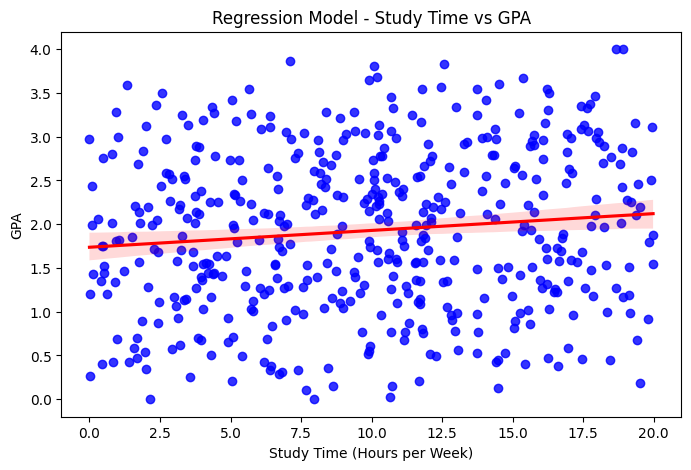

In [ ]:
# Plot the regression line along with the actual data points
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test['StudyTimeWeekly'], y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Study Time (Hours per Week)")
plt.ylabel("GPA")
plt.title("Regression Model - Study Time vs GPA")
plt.show()
